In [14]:
import pandas as pd
import numpy as np
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [ ]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

Data types in 'indu' dataframe:
Time       datetime64[ns]
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
dtype: object

Data types in 'cons' dataframe:
Time        datetime64[ns]
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
cons_Q4            float64
cons_Q5            float64
cons_Q6            float64
cons_Q7            float64
cons_Q8            float64
cons_Q9            float64
cons_Q10           float64
cons_Q11           float64
cons_Q12           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
Time       datetime64[ns]
dtype: object
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
con

In [ ]:
#Using the period 1990-2020 for training and 2021-2023 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2020-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2020-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2020-01-01')]

indu_test = indu[(indu['Time'] >= '2020-01-01') & (indu['Time'] < '2024-01-01')]
cons_test = cons[(cons['Time'] >= '2020-01-01') & (cons['Time'] < '2024-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2020-01-01') & (gdp['Time'] < '2024-01-01')]

#Printing the length of the training and testing data
print("indu lenght: ", len(indu_train), " cons lenght: ", len(cons_train)," gdp lenght: ", len(gdp_train))
print("indu lenght: ", len(indu_test), " cons lenght: ", len(cons_test)," gdp lenght: ", len(gdp_test))

indu lenght:  120  cons lenght:  120  gdp lenght:  120
indu lenght:  16  cons lenght:  16  gdp lenght:  16


In [ ]:

#Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog = pd.concat([indu_train, cons_train], axis=1)

#Remove the Time column
exog.drop('Time', axis=1, inplace=True)

#Fit auto_arima function to the data
arimax_model = auto_arima(gdp_train['Value'], exogenous=exog, 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, 
                          seasonal=False,
                          trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the model
arimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=818.127, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=997.679, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=869.547, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=917.729, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1000.663, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=819.998, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=818.089, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=900.845, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=812.889, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=775.668, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=778.577, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=755.203, Time=0.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=795.986, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Tot

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -369.601
Date:                Tue, 09 Apr 2024   AIC                            755.203
Time:                        12:29:49   BIC                            777.436
Sample:                             0   HQIC                           764.231
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.7052      1.861      6.829      0.000       9.059      16.352
ar.L1         -1.0376      0.026    -40.435      0.000      -1.088      -0.987
ar.L2         -1.0177      0.034    -30.097      0.000      -1.084      -0.951
ar.L3         -0.9764      0.025    -38.367      0.000      -1.026      -0.926
ma.L1          0.8940      0.095      9.366      0.000       0.707       1.081
ma.L2          0.8805      0.098      9.001      0.000       0.689       1.072
ma.L3          0.6491      0.089      7.294      0.000       0.475       0.823
sigma2        27.7479      3.359      8.260      0.000      21.163      34.332
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                17.11
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.64
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

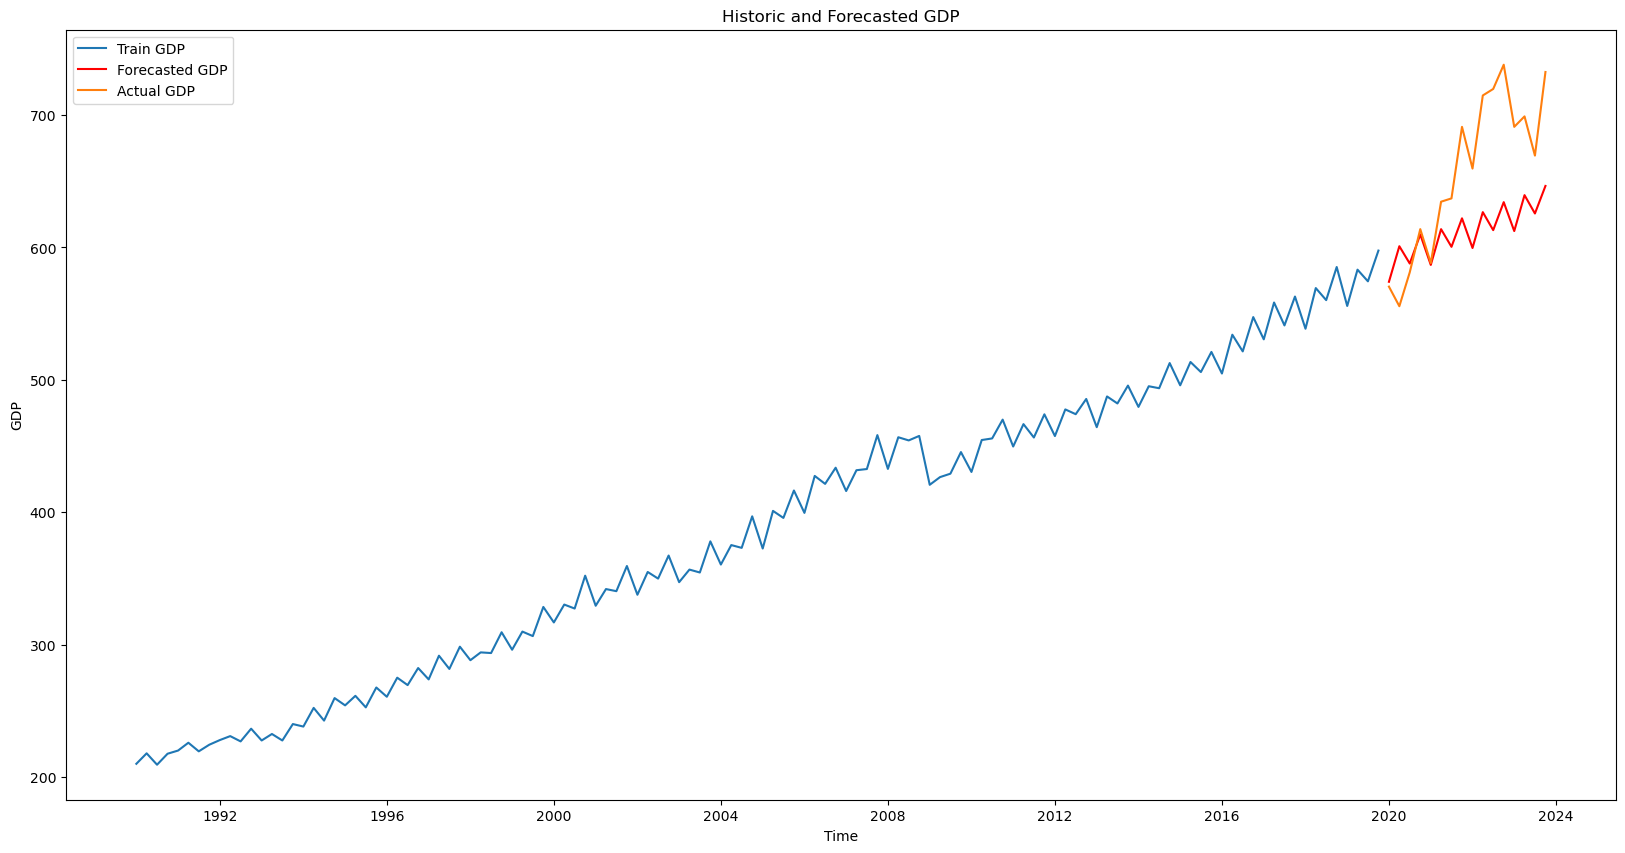

In [ ]:
# Forecast 16 quarters ahead based on test indu and cons
exog_test = pd.concat([indu_test, cons_test], axis=1)

# Remove the Time column
exog_test.drop('Time', axis=1, inplace=True)

# Forecast the GDP values
forecast = arimax_model.predict(n_periods=16, exogenous=exog_test)

# Get the forecasted values
forecast_values = forecast.tolist()

# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(gdp_test['Time'], forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [16]:
#Comparing the forecasted values with the actual values trough RMSE and MAPE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)
# Calculate the MAPE
mape_value = mean_absolute_percentage_error(gdp_test['Value'], forecast_values)*100 #Multiplying by 100 to get the percentage

# Print the RMSE
print("The RMSE is", rmse_value)
# Print the MAPE
print("The MAPE is", mape_value)

#The RMSE is 62, which is quite high. This is likely due to the fact that the model is not very good at predicting the GDP in the period 2020 - 2023. This is likely due to the COVID-19 pandemic, which has caused a lot of uncertainty in the economy. The model is not able to capture this uncertainty, and therefore the forecast is not very accurate.
#The MAPE is 7,4% off, which is quite high. This means that the forecasted values are on average 7,4% off from the actual values. This is not very good, and indicates that the model is not very accurate.

The RMSE is 61.82618495030871
The MAPE is 7.39191773877908
